<a href="https://colab.research.google.com/github/ashikKN/LoanPrediction_IMA_ICT/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the Data**

In [2]:
train = pd.read_csv('/content/train_ctrUa4K.csv')
test = pd.read_csv('/content/test_lAUu6dG.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train_original = train.copy()
test_original = test.copy()

# **Data Preprocessing**

In [16]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [11]:
train.shape

(614, 13)

In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [49]:
test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


**Handling Missing Values**

In [20]:
numerical_columns = ['LoanAmount','Loan_Amount_Term','Credit_History']

for col in numerical_columns:
  train[col].fillna(train[col].median(),inplace = True)

In [54]:
for col in numerical_columns:
  test[col].fillna(train[col].median(),inplace=True)

In [23]:
# dropping rows with missing values of column Married - number of missing value is relatively small
train.dropna(subset=['Married'],inplace = True)

In [50]:
test.dropna(subset=['Married'],inplace = True)

In [35]:
# replacing missing values with most frequent value
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [51]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

In [37]:
# replacing missing values in gender columnn with most frequent values
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [53]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [38]:
# replacing missing values in gender columnn with most frequent values
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [52]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

In [39]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [55]:
test.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Outlier Detection and Removal

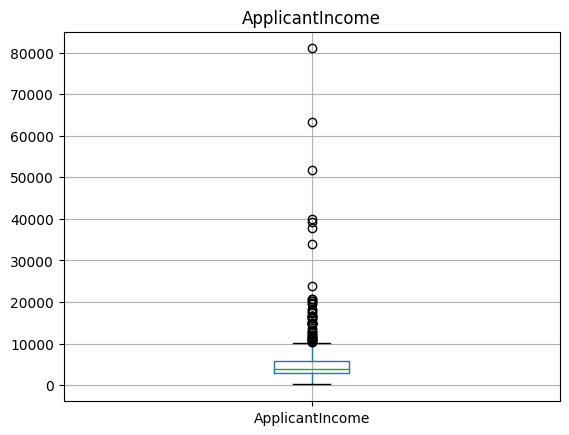

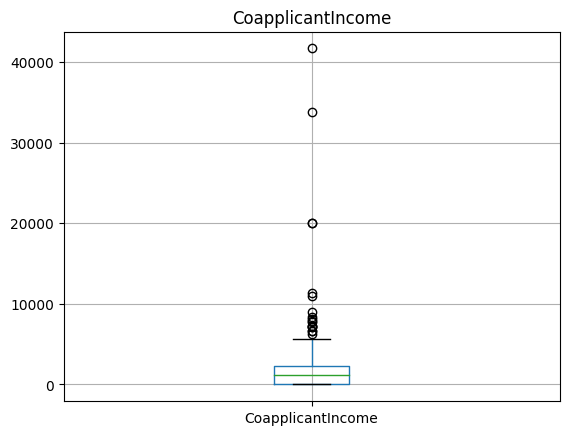

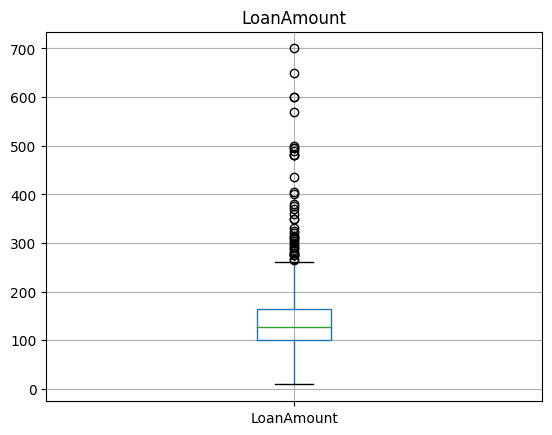

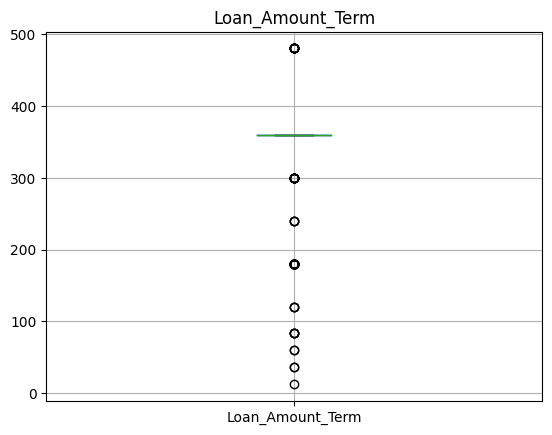

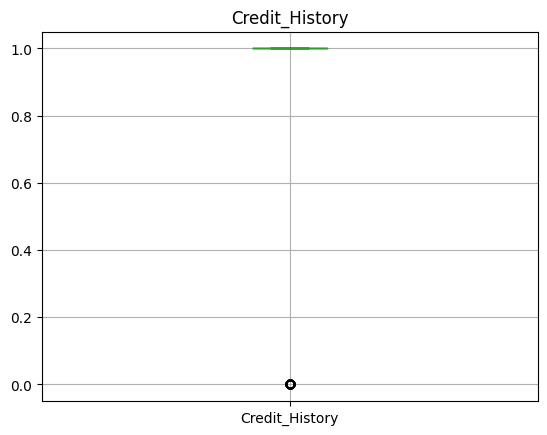

In [40]:
for column in train.select_dtypes(include=['number']):
  # print(column)
  plt.figure()
  train.boxplot(column)
  plt.title(column)

In [42]:
for column in train.select_dtypes(include=['number']):
  q1=train[column].quantile(0.25)
  q3=train[column].quantile(0.75)

  iqr=q3-q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  train[column]=train[column].clip(lower_bound,upper_bound)


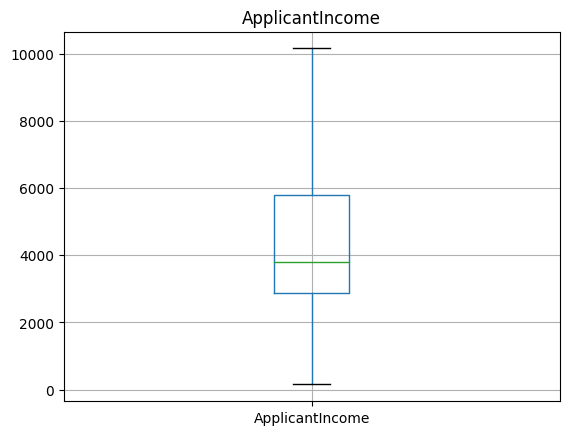

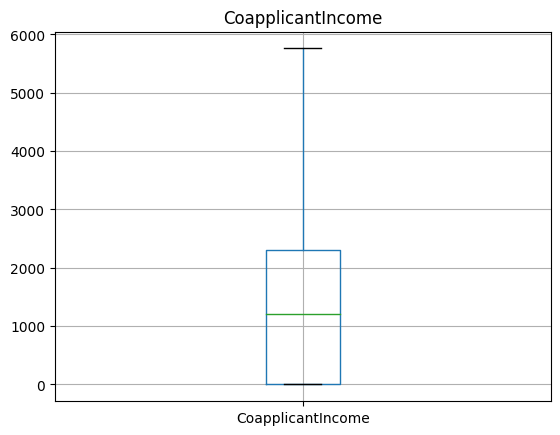

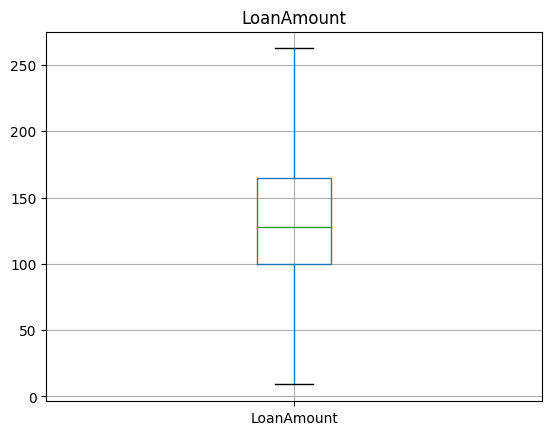

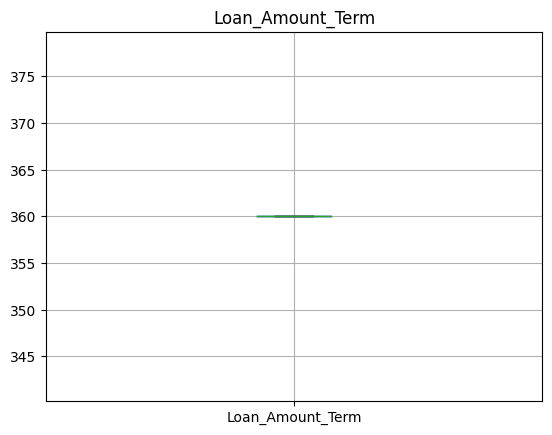

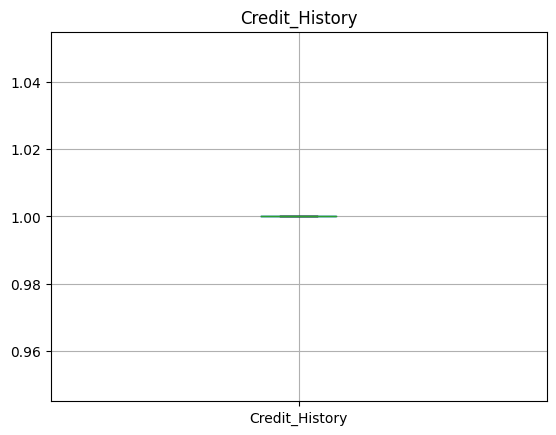

In [43]:
for column in train.select_dtypes(include=['number']):
  plt.figure()
  train.boxplot(column)
  plt.title(column)

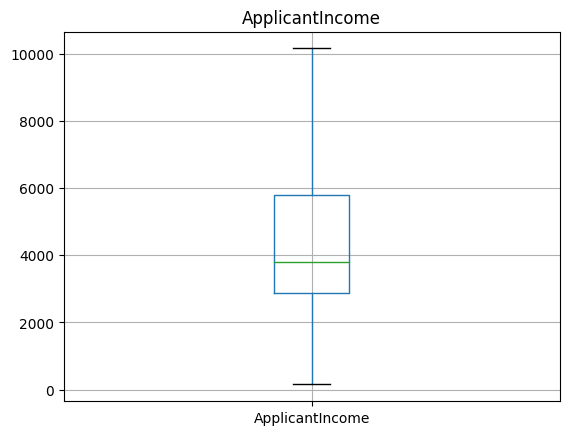

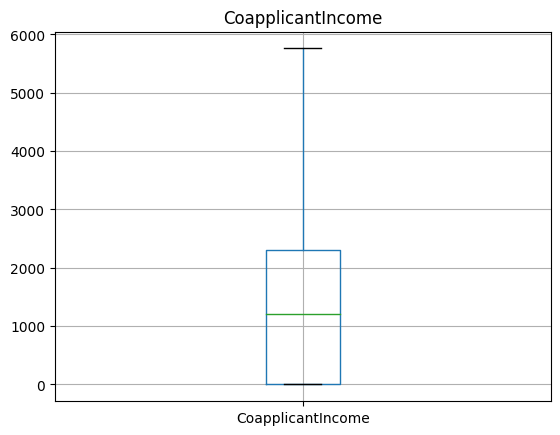

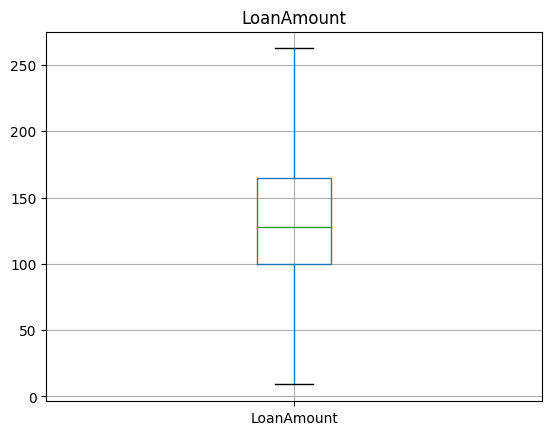

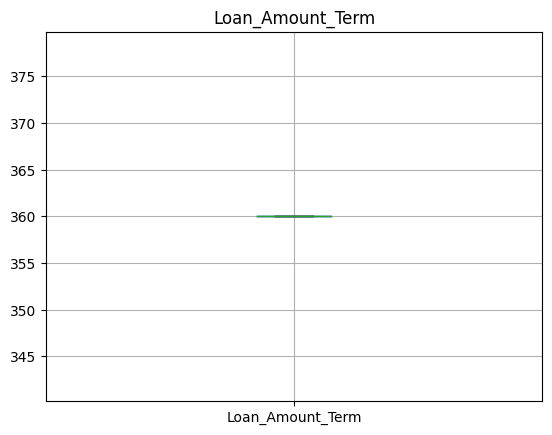

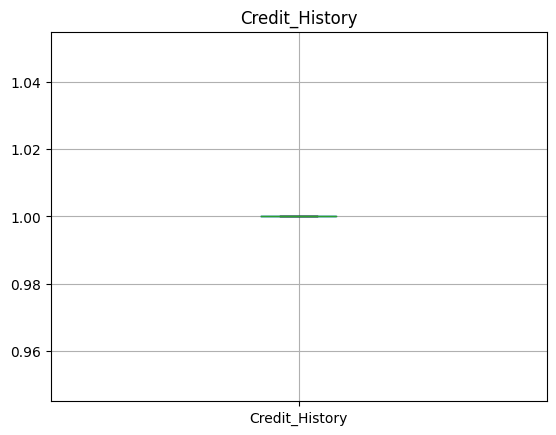

In [56]:
for column in test.select_dtypes(include=['number']):
  plt.figure()
  train.boxplot(column)
  plt.title(column)

# **Encoding**

In [47]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [59]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status','Property_Area']
le = LabelEncoder()
for col in binary_cols:
    train[col] = le.fit_transform(train[col])

In [62]:
binary_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']
for col in binary_cols:
    test[col] = le.fit_transform(test[col])

In [63]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106.0,0.0,40.0,360.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [64]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [69]:
train.drop(columns=['Loan_ID'], inplace=True)
test.drop(columns=['Loan_ID'], inplace=True)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

In [71]:
X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [73]:
from sklearn import metrics
y_pred = model.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1 Score:", metrics.f1_score(y, y_pred))

Accuracy: 0.9967266775777414
Precision: 0.995249406175772
Recall: 1.0
F1 Score: 0.9976190476190476


In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [75]:
y_pred = model.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1 Score:", metrics.f1_score(y, y_pred))

Accuracy: 0.6824877250409165
Precision: 0.685337726523888
Recall: 0.9928400954653938
F1 Score: 0.8109161793372319


In [76]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, y)

SVC()

In [77]:
y_pred = model.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1 Score:", metrics.f1_score(y, y_pred))

Accuracy: 0.6923076923076923
Precision: 0.6902800658978583
Recall: 1.0
F1 Score: 0.8167641325536062


In [78]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [79]:
y_pred= model.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1 Score:", metrics.f1_score(y, y_pred))

Accuracy: 0.9967266775777414
Precision: 0.9976133651551312
Recall: 0.9976133651551312
F1 Score: 0.9976133651551312


In [80]:
model_final=RandomForestClassifier(random_state=42)
model_final.fit(X,y)

RandomForestClassifier(random_state=42)

In [82]:
test_pred = model_final.predict(test)

In [83]:
test_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [84]:
test_pred= ['Y' if pred == 1 else 'N' for pred in test_pred]

In [85]:
original_test = pd.read_csv('/content/test_lAUu6dG.csv')

In [86]:
submission = pd.DataFrame({
    'Loan_ID': original_test['Loan_ID'],
    'Loan_Status': test_pred
})

In [87]:
submission.to_csv('loan_predictions.csv', index=False)

In [88]:
from google.colab import files

files.download('loan_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
from sklearn.tree import DecisionTreeClassifier
model_decision= DecisionTreeClassifier()
model_decision.fit(X,y)

DecisionTreeClassifier()

In [91]:
test_prediction = model_decision.predict(test)

In [92]:
test_prediction= ['Y' if pred == 1 else 'N' for pred in test_prediction]

In [93]:
submission2 = pd.DataFrame({
    'Loan_ID': original_test['Loan_ID'],
    'Loan_Status': test_prediction
})

In [94]:
submission2.to_csv('loan_predictions2.csv', index=False)

In [95]:
from google.colab import files

files.download('loan_predictions2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>